Thomas Conibear - Homework on Brownian Motion 

I looked up how to perform animation functions online and came across an animation library called ffmpeg that worked incredibly well for Brownian Motion based on some online examples. However, despite numerous attempts, I was unable to make this library work. However, I was able to plot just the trace of the Brownian motion in a coordinate plane without an animation showing the progression of the particle. I followed the notes provided by:
people.bu.edu/andasari/courses/stochasticmodeling/lecture5/stochasticlecture5.html

They gave a different take on how to approach Brownian motion in a step by step manner. This article uses a method called the Weiner Process to model Brownian motion. It is based on random numbers and visualizes Brownian motion as a distribution of movements over a given interval of time. Where the particle is at a given point on the coordinate plane is a random variable that is linked to time. 

I also have the code I tried to use for the animation after the 2-d graph. That attempt did not involve the ffmpeg library but it still did not run an animation, rather it gave a blank graph. I tried to use the HTML method that converts the animation to an HTML but it requires ffmpeg to run. Also attempted %matplotlab notebook inline but it is again blank. 

<IPython.core.display.Javascript object>


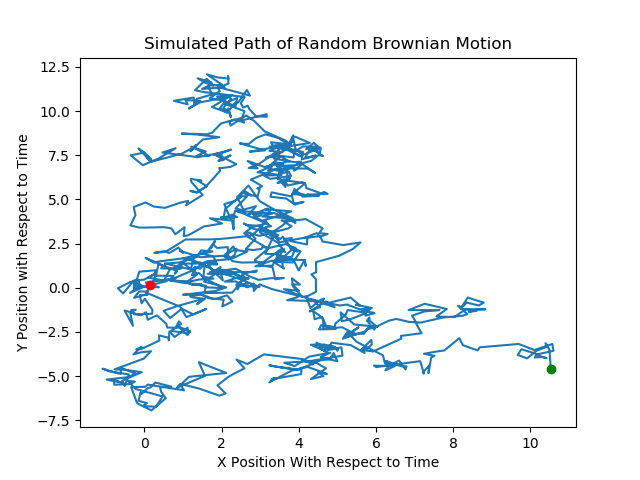

In [8]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(5)


    
T = 100  #Time interval, changes axes
N = 1000 #Number of particles
dt = T/(N-1) # Time step interval that helps to discretize Brownian motion given our initial conditions

dX = np.sqrt(dt) * np.random.randn(1,N)
X = np.cumsum(dX, axis=1) #Cumsum is a cumulative summation of what dX produces. So the final graph will show this
    
dY = np.sqrt(dt) * np.random.randn(1,N)
Y = np.cumsum(dY, axis=1)
    
#New method of graphing introduced in the online notes I found, more easily graphs and aggregates each particle movement
fig, ax = plt.subplots()
ax.plot(X[0,:], Y[0,:])
ax.plot(X[0,0], Y[0,0], 'ro')
ax.plot(X[0,-1], Y[0,-1], 'go')
ax.set_xlabel('X Position With Respect to Time')
ax.set_ylabel('Y Position with Respect to Time')
ax.set_title('Simulated Path of Random Brownian Motion')
plt.show()

The below diagram should be the animation depicting the step by step movement of the particle above but it does not work for some reason. 

<IPython.core.display.Javascript object>


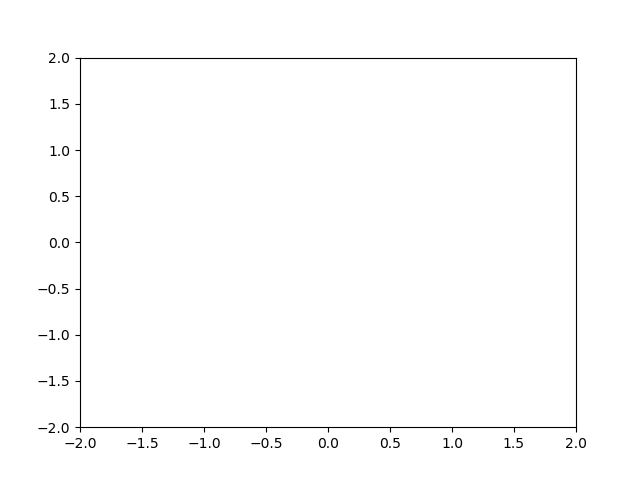

In [7]:
#Not functional code on animation of Brownian motion, nothing moves or appears on the graph

from matplotlib import animation
import numpy as np
%matplotlib notebook
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.rcParams["animation.html"] = "jshtml" Tried this javascript method as well that gave out an aesthetically pleasing and
#User friendly diagram but it also had nothing on it. I kept it in code for future use/reference. 

T = 100
N = 1000
dt = T/(N-1)

def Brownian_Motion(dt, N):
    dX = np.sqrt(dt) * np.random.randn(1, N)
    X = np.cumsum(dX, axis=1)

    dY = np.sqrt(dt) * np.random.randn(1, N)
    Y = np.cumsum(dY, axis=1)

    lineData = np.vstack((X, Y))

    return lineData

data = [Brownian_Motion(dt, N)]

fig, ax = plt.subplots()

lines = [ax.plot(dat[0, 0:1], dat[1, 0:1])[0] for dat in data]

ax = plt.axes(xlim=(-2.0, 2.0), ylim=(-2.0, 2.0))

def Brownian_Motion2(num, data, lines):
    for u, v in zip(lines, data):
        u.set_data(v[0:2, :num])
    return lines

anim = animation.FuncAnimation(fig, Brownian_Motion2, N+1, fargs=(data, lines),
                                   interval=15, repeat=True, blit=False)  

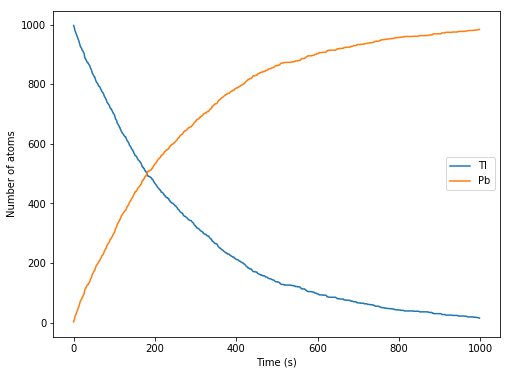

In [7]:
#Radioactive Decay code from notes. Generates random numbers constrained by our equation to simulate radioactive decay
#Given initial values of a specific element or isotope and it's respective decay constant

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])

tau = 3.053*60

N_atom = 1000   #1000 Tl atoms
N_time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()